<a href="https://colab.research.google.com/github/nhysmith/4650_Stock_Project/blob/main/CS_4650_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
pip install yfinance --upgrade --no-cache-dir

**Week 4**

This week I fine tuned the models I used last week.

In [163]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
import datetime as dt
import yfinance as yf

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 12, 8)

test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime(2021, 12, 9)



In [164]:
nvda= yf.download('NVDA', start=start, end=end)
nvdaTest= yf.download('NVDA', start=test_start, end=test_end)
df = pd.DataFrame(nvda) 
df_ = pd.DataFrame(nvdaTest) 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [165]:
df.to_csv('NVDIA_stocks.csv')
df = pd.read_csv('NVDIA_stocks.csv')
df_.to_csv('NVDIA_test.csv')
df_ = pd.read_csv('NVDIA_test.csv')

In [166]:
df.shape

(488, 7)

In [167]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,238.750000,239.910004,236.720001,239.910004,239.705109,5941969
1,2020-01-03,235.100006,237.830002,234.100006,236.070007,235.868408,5144308
2,2020-01-06,232.320007,237.270004,231.270004,237.059998,236.857544,6572812
3,2020-01-07,238.199997,241.770004,236.389999,239.929993,239.725098,7736594
4,2020-01-08,239.759995,242.039993,238.149002,240.380005,240.174728,6931017
...,...,...,...,...,...,...,...
483,2021-12-01,332.194702,332.893402,313.799988,314.350006,314.350006,48580204
484,2021-12-02,312.140015,324.779907,310.250000,321.260010,321.260010,47289033
485,2021-12-03,320.000000,321.290009,301.299988,306.929993,306.929993,54432505
486,2021-12-06,298.799988,302.410004,280.380005,300.369995,300.369995,65893845


In [168]:
X_train = df['Date']
Y_train = df['Adj Close']
X_train

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
483    2021-12-01
484    2021-12-02
485    2021-12-03
486    2021-12-06
487    2021-12-07
Name: Date, Length: 488, dtype: object

In [169]:
Y_train

0      239.705109
1      235.868408
2      236.857544
3      239.725098
4      240.174728
          ...    
483    314.350006
484    321.260010
485    306.929993
486    300.369995
487    324.269989
Name: Adj Close, Length: 488, dtype: float64

In [170]:
X_test = df_['Date']
Y_test = df_['Adj Close']
X_test

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
484    2021-12-02
485    2021-12-03
486    2021-12-06
487    2021-12-07
488    2021-12-08
Name: Date, Length: 489, dtype: object

In [171]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)


In [172]:
import matplotlib.dates as mdates
dates_df = df.copy()
dates_df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,238.750000,239.910004,236.720001,239.910004,239.705109,5941969
1,2020-01-03,235.100006,237.830002,234.100006,236.070007,235.868408,5144308
2,2020-01-06,232.320007,237.270004,231.270004,237.059998,236.857544,6572812
3,2020-01-07,238.199997,241.770004,236.389999,239.929993,239.725098,7736594
4,2020-01-08,239.759995,242.039993,238.149002,240.380005,240.174728,6931017
...,...,...,...,...,...,...,...
483,2021-12-01,332.194702,332.893402,313.799988,314.350006,314.350006,48580204
484,2021-12-02,312.140015,324.779907,310.250000,321.260010,321.260010,47289033
485,2021-12-03,320.000000,321.290009,301.299988,306.929993,306.929993,54432505
486,2021-12-06,298.799988,302.410004,280.380005,300.369995,300.369995,65893845


In [173]:
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
dates_df['Date']

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
483    738125.0
484    738126.0
485    738127.0
486    738130.0
487    738131.0
Name: Date, Length: 488, dtype: float64

In [174]:
X_train = dates_df['Date']
X_train

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
483    738125.0
484    738126.0
485    738127.0
486    738130.0
487    738131.0
Name: Date, Length: 488, dtype: float64

In [175]:
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

In [176]:
testDates = X_test.map(mdates.datestr2num)
testDates

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
484    738126.0
485    738127.0
486    738130.0
487    738131.0
488    738132.0
Name: Date, Length: 489, dtype: float64

In [177]:
X_test = testDates
X_test= X_test.values.reshape(-1, 1)


For some reason the NVDA graph showed a huge spike in the data that doesn't actually seem to be present. For that reason I decided against either trading any NVDA this week

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


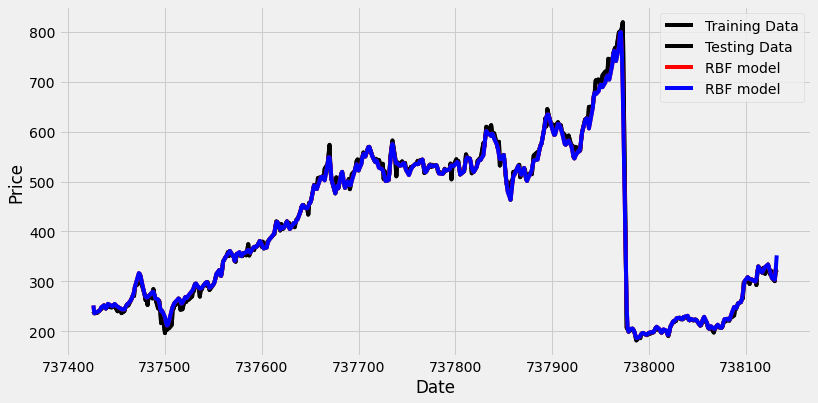

In [178]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


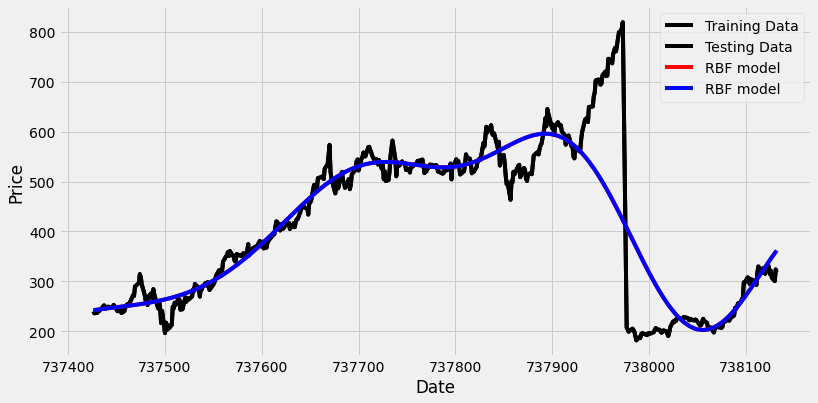

In [179]:
svr_rbf = SVR(kernel= 'rbf', C= 1e4, epsilon= 0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Lowes**

I started with a larger range of training and test dates but I decided to try narrowing the time to see if I could get a better model. I was happier with the new results. Ultimately I decided to buy 5 shares.

In [180]:
lowes= yf.download('LOW', start=start, end=end)
lowesTest= yf.download('LOW', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [181]:
df = pd.DataFrame(lowes) 
df_ = pd.DataFrame(lowesTest) 
df.to_csv('LOWES_stocks.csv')
df = pd.read_csv('LOWES_stocks.csv')
df_.to_csv('LOWES_test.csv')
df_ = pd.read_csv('LOWES_test.csv')

In [182]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


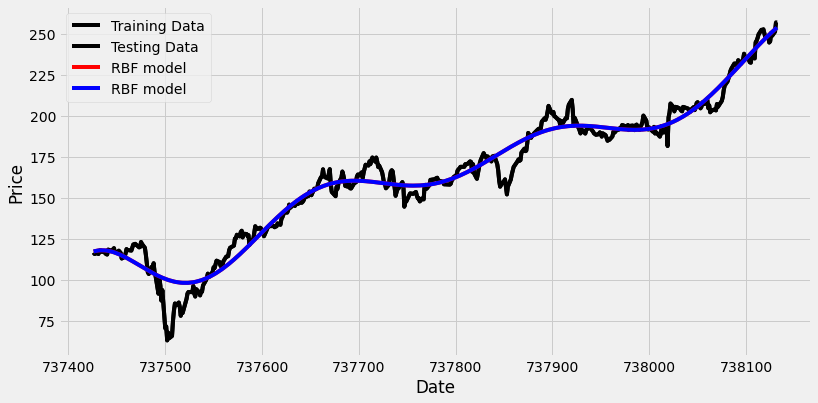

In [183]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


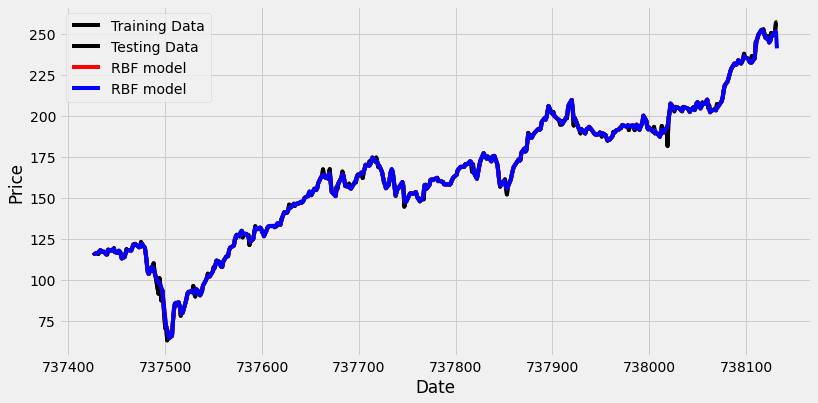

In [184]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [185]:
start = dt.datetime(2021, 11, 1)
end = dt.datetime(2021, 12, 9)

test_start = dt.datetime(2021, 12, 1)
test_end = dt.datetime(2021, 12, 10)
lowes= yf.download('LOW', start=start, end=end)
lowesTest= yf.download('LOW', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [186]:
df = pd.DataFrame(lowes) 
df_ = pd.DataFrame(lowesTest) 
df.to_csv('LOWES_stocks.csv')
df = pd.read_csv('LOWES_stocks.csv')
df_.to_csv('LOWES_test.csv')
df_ = pd.read_csv('LOWES_test.csv')

In [187]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


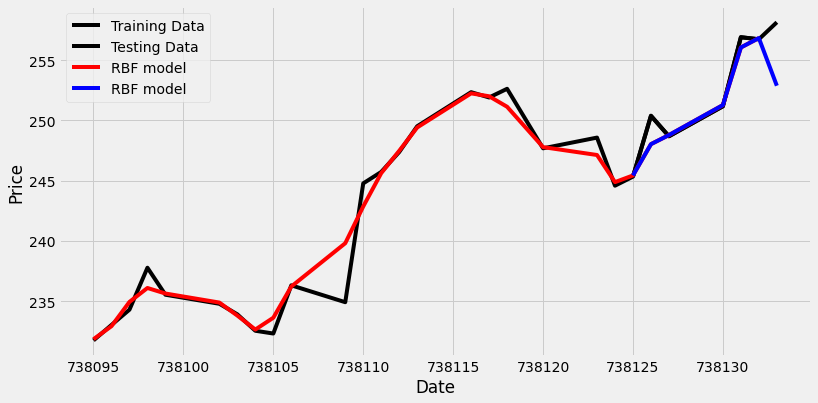

In [188]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


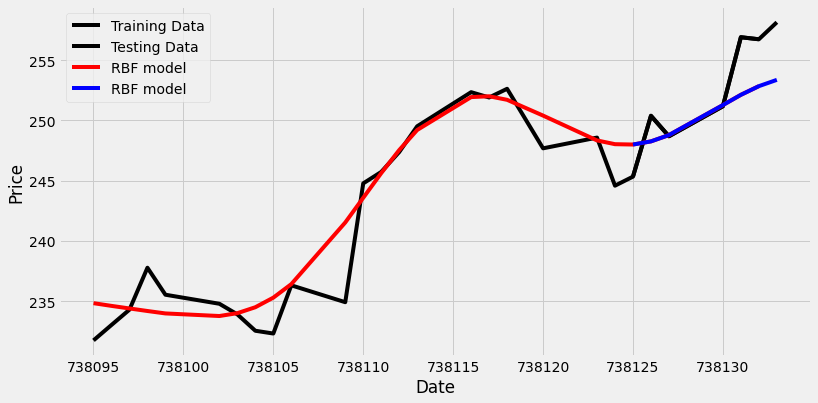

In [189]:
svr_rbf = SVR(kernel= 'rbf', C= 10, gamma= 0.01)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**AAPL**

I continued to experiment with different values for C, epsilon and gamma. Ultimately I decided to buy 5 shares.

In [190]:
aapl= yf.download('AAPL', start=start, end=end)
aaplTest= yf.download('AAPL', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [191]:
df = pd.DataFrame(aapl) 
df_ = pd.DataFrame(aaplTest) 
df.to_csv('AAPL_stocks.csv')
df = pd.read_csv('AAPL_stocks.csv')
df_.to_csv('AAPL_test.csv')
df_ = pd.read_csv('AAPL_test.csv')

In [192]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


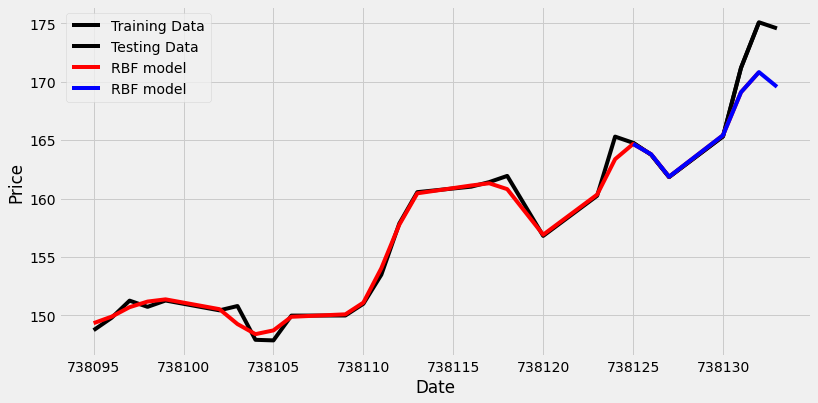

In [193]:
svr_rbf = SVR(kernel="rbf", C=10, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


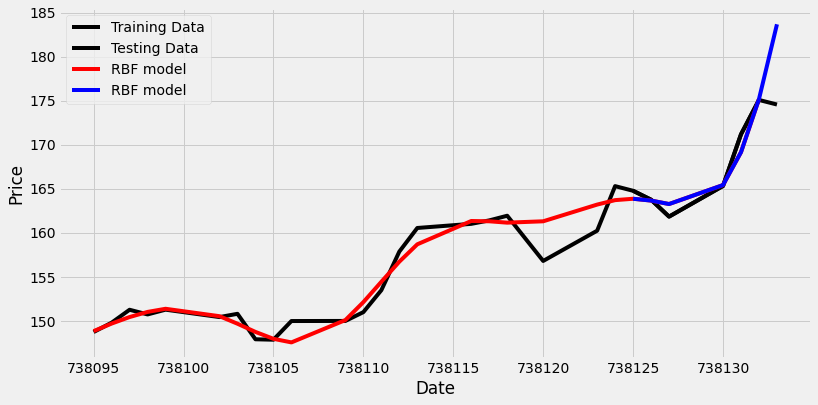

In [194]:
svr_rbf = SVR(kernel= 'rbf', C= 1e4, epsilon= 0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


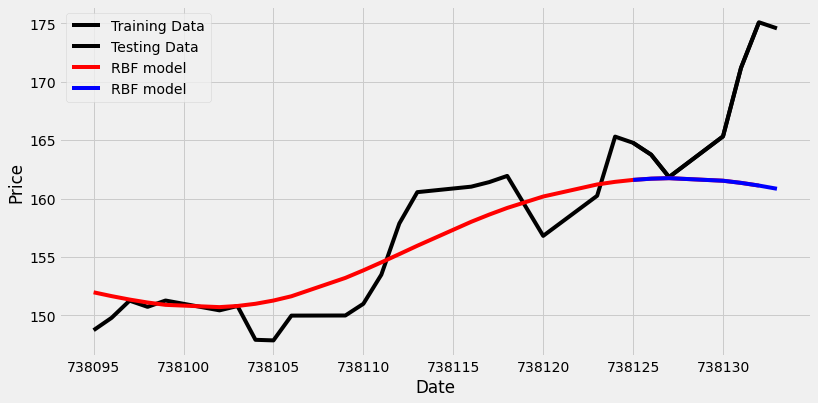

In [195]:
svr_rbf = SVR(kernel= 'rbf', C= 1, epsilon= 0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**CFVI**

I decided to short 5 shares of this stock.

In [196]:
#start = dt.datetime(2021, 12, 1)
#end = dt.datetime(2021, 12, 9)

#test_start = dt.datetime(2021, 12, 1)
#test_end = dt.datetime(2021, 12, 10)

#cfvi= yf.download('CFVI', start=start, end=end)
#cfviTest= yf.download('CFVI', start=test_start, end=test_end)


In [197]:
cfvi= yf.download('CFVI', start=start, end=end)
cfviTest= yf.download('CFVI', start=test_start, end=test_end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [198]:
df = pd.DataFrame(cfvi) 
df_ = pd.DataFrame(cfviTest) 
df.to_csv('CFVI_stocks.csv')
df = pd.read_csv('CFVI_stocks.csv')
df_.to_csv('CFVI_test.csv')
df_ = pd.read_csv('CFVI_test.csv')

In [199]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


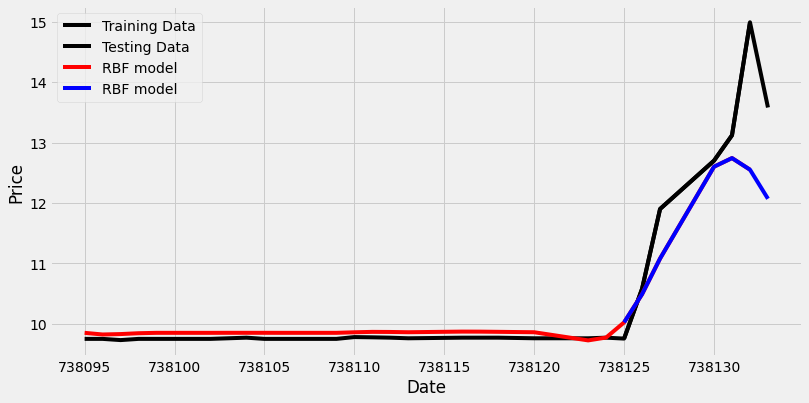

In [200]:
svr_rbf = SVR(kernel="rbf", C=1, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


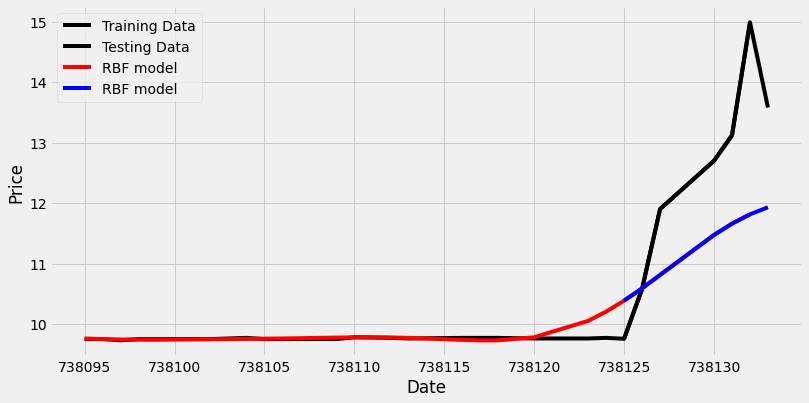

In [201]:
svr_rbf = SVR(kernel= 'rbf', C= 1, epsilon= 0.01)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()